# Handwritten Digit Recognition with CNN

This notebook demonstrates building a Convolutional Neural Network (CNN) for recognizing handwritten digits using the MNIST dataset.

## Import Libraries
Import all necessary libraries including NumPy, Matplotlib, Keras, and neural network layers.

### Why Each Package is Needed:

**Core Libraries:**
- **`numpy`** - Essential for numerical operations and array manipulation. Handles image data as multi-dimensional arrays, performs mathematical operations (normalization, reshaping), and processes predictions (argmax to find highest probability class).
- **`matplotlib.pyplot`** - Visualization library for displaying sample handwritten digit images, plotting training/validation accuracy and loss curves, and creating prediction result visualizations.

**Deep Learning Framework:**
- **`keras`** - High-level neural network API that provides easy model building and training, pre-built datasets (MNIST), utility functions like `to_categorical()` for one-hot encoding, and model saving/loading capabilities.
- **`keras.datasets.mnist`** - Provides direct access to the MNIST dataset with 60,000 pre-labeled training images of handwritten digits and 10,000 test images.

**Neural Network Architecture Components:**
- **`keras.models.Sequential`** - Creates a linear stack of layers, allowing you to add layers one after another with a simple API for building feed-forward networks.
- **`keras.layers.Dense`** - Fully connected layer used for the final classification layer (10 output neurons for digits 0-9) that connects every neuron to the previous layer.
- **`keras.layers.Conv2D`** - 2D Convolutional layer that extracts spatial features from images (edges, patterns, shapes) using learnable filters. Essential for image recognition tasks.
- **`keras.layers.MaxPool2D`** - Max pooling layer that reduces spatial dimensions (downsampling), retains most important features, reduces computational cost, and helps prevent overfitting.
- **`keras.layers.Flatten`** - Reshapes data by converting 2D feature maps to 1D vector, required before passing to Dense layers.
- **`keras.layers.Dropout`** - Regularization technique that randomly drops 25% of neurons during training to prevent overfitting and improve generalization to new data.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

## Load MNIST Dataset
Load the MNIST dataset which contains 60,000 training images and 10,000 test images of handwritten digits (0-9). Each image is 28x28 pixels in grayscale.

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Visualize Sample Data
Display a sample image from the training dataset to understand the data format and quality.

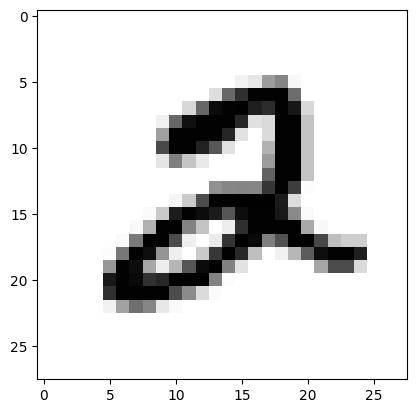

In [16]:
plt.imshow(x_train[5], cmap='binary')

## Preprocess Data
Normalize pixel values to range [0, 1], add channel dimension for CNN input, and convert labels to one-hot encoded format for categorical classification.

### Detailed Explanation with Examples:

**1. Normalization (Divide by 255):**
- **Original pixel values:** Range from 0 to 255 (grayscale)
  - Example: `[0, 128, 255, 64, 200]` (black to white intensities)
- **After dividing by 255:** Range from 0.0 to 1.0
  - Example: `[0.0, 0.502, 1.0, 0.251, 0.784]`
- **Why?** Neural networks learn better with smaller, normalized numbers. It's like converting from centimeters to meters - easier to work with!

**2. Adding Channel Dimension (expand_dims):**
- **Original shape:** `(60000, 28, 28)` - 60,000 images, each 28×28 pixels
- **After expand_dims:** `(60000, 28, 28, 1)` - Same images but with 1 color channel
- **Why?** CNNs expect images in format: (batch, height, width, channels)
  - For RGB color images: channels = 3 (Red, Green, Blue)
  - For grayscale: channels = 1 (just intensity)
- **Think of it as:** Adding a label that says "this is grayscale" to each image

**3. One-Hot Encoding (to_categorical):**
- **Original labels:** Single number representing the digit
  - Example: `5` (the digit five)
- **After one-hot encoding:** Array of 10 positions (one for each digit 0-9)
  - Example: `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]` (position 5 is "1", rest are "0")
  
  **More examples:**
  - Label `0` → `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]`
  - Label `3` → `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`
  - Label `9` → `[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]`
  
- **Why?** The neural network outputs probabilities for each class. One-hot encoding matches this format and makes it easier to calculate loss during training.
  - Think of it as: Instead of saying "the answer is 5", we say "Is it 0? No. Is it 1? No... Is it 5? YES!"

In [17]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

## Verify Data Shape
Check the shape of the preprocessed training data to ensure it has the correct dimensions (60000, 28, 28, 1).

### Understanding the Shape (60000, 28, 28, 1):

This is a 4-dimensional array. Let's break it down:

- **60000** = Number of images (samples)
  - We have 60,000 different handwritten digit images in the training set
  
- **28** = Height of each image (rows)
  - Each image is 28 pixels tall
  
- **28** = Width of each image (columns)
  - Each image is 28 pixels wide
  
- **1** = Number of color channels
  - 1 = Grayscale (black and white)
  - If this was 3, it would be RGB color (Red, Green, Blue channels)

**Visual analogy:**
Think of it like a stack of 60,000 photo albums, where each photo is 28×28 pixels in black and white.

**Real-world example:**
- `x_train[0]` = First image (28×28×1)
- `x_train[0][10][15]` = Pixel at row 10, column 15 of the first image
- `x_train[0][10][15][0]` = The grayscale intensity value at that pixel (between 0.0 and 1.0)

In [18]:
x_train.shape

(60000, 28, 28, 1)

## Build CNN Model
Create a Sequential model with:
- 2 Convolutional layers (32 and 64 filters) with ReLU activation
- MaxPooling layers for dimensionality reduction
- Flatten layer to convert 2D features to 1D
- Dropout layer (25%) to prevent overfitting
- Dense output layer with softmax activation for 10 classes

In [19]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape =(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Display Model Architecture
Show the model summary including layer types, output shapes, and total number of parameters.

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Setup Training Callbacks
Configure callbacks for training:
- **EarlyStopping**: Stop training if validation accuracy doesn't improve
- **ModelCheckpoint**: Save the best model during training

In [21]:
# callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

mc = ModelCheckpoint('./bestmodel.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

## Train the Model
Train the CNN model for 5 epochs using 70% of training data for training and 30% for validation. Monitor training and validation metrics.

### Understanding Training Parameters:

**What is an Epoch?**
- **1 Epoch** = The model sees every training image exactly once
- **5 Epochs** = The model goes through the entire dataset 5 times

**Why multiple epochs?**
- **Learning is gradual:** Just like studying for an exam, you don't master everything in one reading!
- **First epoch:** Model learns basic patterns (rough sketches)
- **Later epochs:** Model refines its understanding (fine details)
- **Real-world analogy:** Reading a textbook 5 times - each time you understand better

**Example of learning progression:**
- **Epoch 1:** Accuracy = 85% (learning basic shapes)
- **Epoch 2:** Accuracy = 92% (recognizing patterns better)
- **Epoch 3:** Accuracy = 95% (getting even better)
- **Epoch 4:** Accuracy = 97% (fine-tuning)
- **Epoch 5:** Accuracy = 98% (polished performance)

**Why not 100 epochs?**
- Too many epochs can cause **overfitting** (memorizing instead of learning)
- Like a student who memorizes answers instead of understanding concepts
- 5 epochs is usually enough for MNIST dataset

---

**What is validation_split=0.3?**

This splits your training data into two parts:
- **70% (0.7) for Training:** Model learns from these images
- **30% (0.3) for Validation:** Model is tested on these (to check if it's really learning)

**Why split the data?**
- **Training data:** Model sees and learns from these
- **Validation data:** Model is tested on these (but doesn't learn from them)
- **Purpose:** Check if model can recognize NEW images it hasn't seen during training

**Real-world analogy:**
Think of it like practicing math problems:
- **Training (70%):** Practice problems you solve and learn from
- **Validation (30%):** Quiz problems to test if you really understood (before the final exam)
- **Test data:** The actual final exam (completely unseen)

**Visual breakdown of 60,000 training images:**
```
Total training data: 60,000 images
├── Training (70%): 42,000 images → Model learns from these
└── Validation (30%): 18,000 images → Model is tested on these during training

Separate test data: 10,000 images → Final evaluation after training
```

**Why this matters:**
- If validation accuracy is much lower than training accuracy = **Overfitting** (memorizing, not learning)
- If both are similar = **Good learning** (model truly understands patterns)

In [22]:
his = model.fit(x_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9356 - loss: 0.2110 - val_accuracy: 0.9758 - val_loss: 0.0796
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9760 - loss: 0.0768 - val_accuracy: 0.9828 - val_loss: 0.0558
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9822 - loss: 0.0562 - val_accuracy: 0.9848 - val_loss: 0.0513
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9861 - loss: 0.0463 - val_accuracy: 0.9869 - val_loss: 0.0442
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9875 - loss: 0.0405 - val_accuracy: 0.9852 - val_loss: 0.0485


## Evaluate Model Performance
Test the trained model on unseen test data to measure final accuracy and loss metrics.

In [23]:
# Evaluate the model on test data
model_score = model.evaluate(x_test, y_test)
print(f"Test Loss: {model_score[0]:.4f}")
print(f"Test Accuracy: {model_score[1]:.4f} ({model_score[1]*100:.2f}%)")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9879 - loss: 0.0388
Test Loss: 0.0388
Test Accuracy: 0.9879 (98.79%)


## Save Model and Metadata
Save the trained model in HDF5 format and create a metadata JSON file containing model configuration, accuracy, and class labels for use in the GUI application.

In [24]:
# Save the trained model
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the model in Keras HDF5 format
model.save('models/cnn_model.h5')
print("Model saved successfully to 'models/cnn_model.h5'")

# Save model metadata
import json

metadata = {
    'model_type': 'CNN',
    'input_shape': [28, 28, 1],
    'num_classes': 10,
    'accuracy': float(model_score[1]),
    'loss': float(model_score[0]),
    'classes': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
}

with open('models/cnn_model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print("Metadata saved to 'models/cnn_model_metadata.json'")
print("\n✓ Model is ready to use with the GUI!")

Model saved successfully to 'models/cnn_model.h5'
Metadata saved to 'models/cnn_model_metadata.json'

✓ Model is ready to use with the GUI!


## Test Predictions
Make predictions on 10 test samples and visualize them. Display predicted vs. true labels with color coding (green for correct, red for incorrect).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


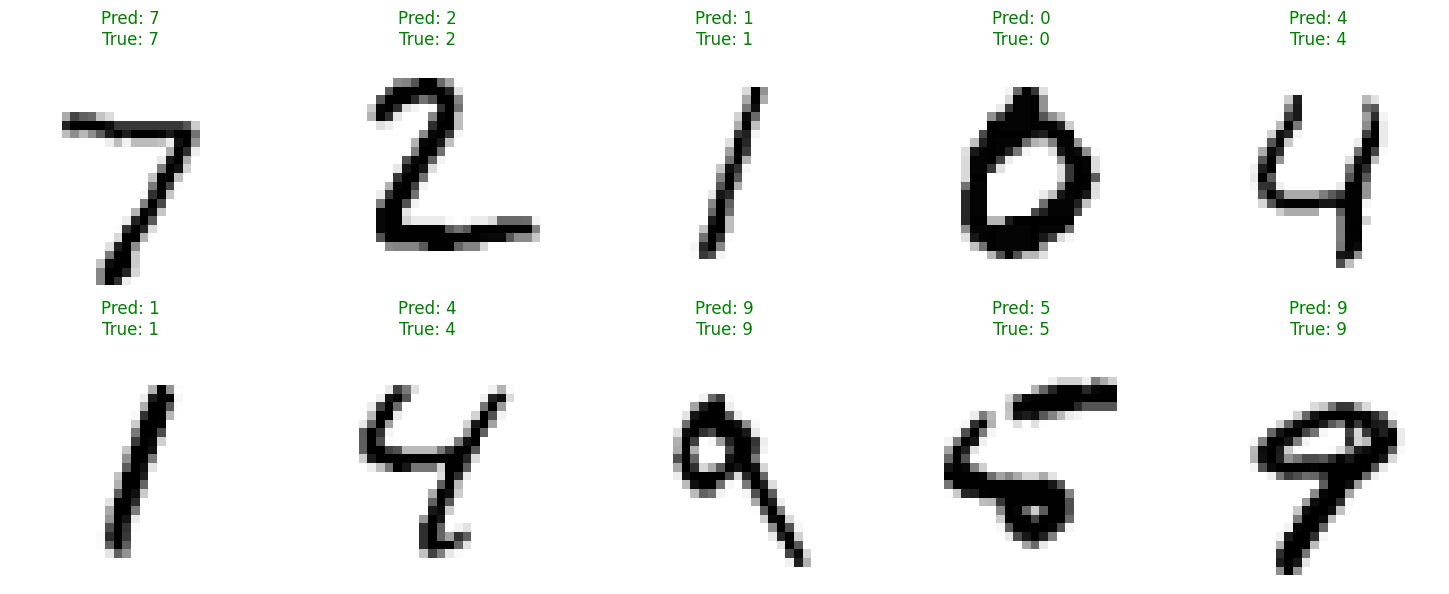

In [25]:
# Make predictions on a few test samples
predictions = model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

# Display predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='binary')
    axes[i].set_title(f'Pred: {predicted_classes[i]}\nTrue: {true_classes[i]}', 
                     color='green' if predicted_classes[i] == true_classes[i] else 'red')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Visualize Training History
Plot training and validation accuracy/loss curves over epochs to analyze model learning progress and check for overfitting.

### Understanding the Two Plots:

These graphs tell the story of how your model learned over time!

---

**📊 Plot 1: Model Accuracy (Left Side)**

Shows how good the model's predictions are (higher is better).

**What the lines mean:**
- **🔵 Training Accuracy (Blue Line):** How well the model predicts on images it's learning from
- **🟠 Validation Accuracy (Orange Line):** How well the model predicts on NEW images it hasn't seen during learning

**How to read it:**
- **X-axis (Horizontal):** Epoch number (1, 2, 3, 4, 5)
- **Y-axis (Vertical):** Accuracy percentage (0.0 to 1.0, where 1.0 = 100%)

**What you want to see:**
- ✅ **Both lines going UP** = Model is learning!
- ✅ **Lines close together** = Model generalizes well (good learning, not memorizing)
- ❌ **Big gap between lines** = Overfitting (memorizing training data)

**Example interpretation:**
```
Epoch 1: Training = 0.85, Validation = 0.83 → Good start!
Epoch 5: Training = 0.98, Validation = 0.97 → Excellent! Model learned well
```

---

**📉 Plot 2: Model Loss (Right Side)**

Shows how wrong the model's predictions are (lower is better).

**What the lines mean:**
- **🔵 Training Loss (Blue Line):** How wrong predictions are on training images
- **🟠 Validation Loss (Orange Line):** How wrong predictions are on validation images

**How to read it:**
- **X-axis (Horizontal):** Epoch number (1, 2, 3, 4, 5)
- **Y-axis (Vertical):** Loss value (higher = more errors, lower = fewer errors)

**What you want to see:**
- ✅ **Both lines going DOWN** = Model is making fewer mistakes!
- ✅ **Lines close together** = Model generalizes well
- ❌ **Validation loss going UP while training loss goes DOWN** = Overfitting!

**Example interpretation:**
```
Epoch 1: Training Loss = 0.45, Validation Loss = 0.48 → Starting to learn
Epoch 5: Training Loss = 0.05, Validation Loss = 0.06 → Very few mistakes!
```

---

**🎯 Combined Interpretation:**

**Ideal Pattern (Good Learning):**
```
Accuracy: Both ↗️ going up, staying close
Loss: Both ↘️ going down, staying close
Conclusion: Model is learning patterns, not memorizing!
```

**Overfitting Pattern (Bad):**
```
Accuracy: Training ↗️ high (98%), Validation ↗️ lower (85%)
Loss: Training ↘️ very low, Validation ↗️ increasing
Conclusion: Model memorized training data, can't handle new images
```

**Underfitting Pattern (Bad):**
```
Accuracy: Both stuck at low values (60-70%)
Loss: Both stuck at high values
Conclusion: Model needs more training or is too simple
```

---

**Real-world analogy:**
Think of a student studying:
- **Training accuracy** = Score on practice problems they've seen
- **Validation accuracy** = Score on quiz problems (similar but different)
- If practice score is 98% but quiz score is 60% → Student memorized answers!
- If both are 95% → Student truly understood the concepts!

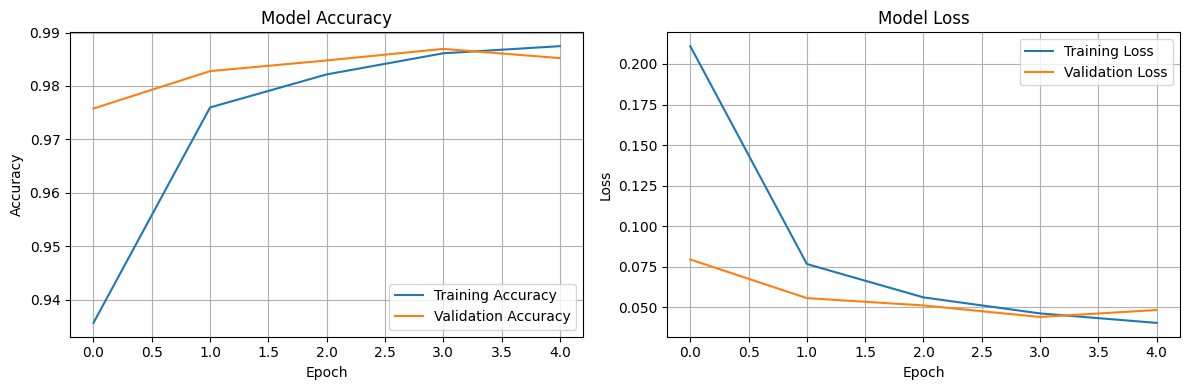

In [26]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'], label='Training Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(his.history['loss'], label='Training Loss')
plt.plot(his.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()